# Lab 2 – Diabetes Progression Prediction  
**Course:** Foundations of Machine Learning Frameworks  
**Student:** Lohith Reddy Danda  
**Student ID:** 9054470  
 

---

## Objective  
This lab explores multiple machine learning models to predict *disease progression one year after baseline* using the Scikit‑Learn diabetes dataset. The goal is to evaluate univariate polynomial regression, multivariate polynomial models, decision trees, k‑nearest neighbors, and logistic regression (classification framing) using a structured train–validation–test workflow.

 SECTION 1  IMPORTS & LOAD DATA


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import (
    r2_score,
    mean_absolute_error,
    mean_absolute_percentage_error,
    accuracy_score,
    precision_score,
    recall_score,
    confusion_matrix
)
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

We import all the tools needed for data analysis, visualization, and machine learning.
These are standard libraries for regression tasks.


Load Dataset

In [16]:
diabetes = datasets.load_diabetes(as_frame=True)
X = diabetes.data
y = diabetes.target

df = X.copy()
df["target"] = y
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


The dataset comes directly from Scikit‑Learn  no downloading required.
X contains 10 standardized features, and y contains the disease progression score.


SECTION 2  PROBLEM FRAMING

This is a regression problem where we predict “disease progression one year after baseline.”
This helps physicians identify high‑risk patients early.

Metrics used:
- R²  how much variance the model explains
- MAE  average absolute error
- MAPE  percentage error

Workshop connections:
- kNN: bias–variance tradeoff
- Logistic regression: linear decision boundary
- Performance metrics: importance of validation and generalization


SECTION 3  EDA

In [17]:
X.info()
X.describe().T
y.describe()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


We inspect the dataset to understand its structure, types, and summary statistics

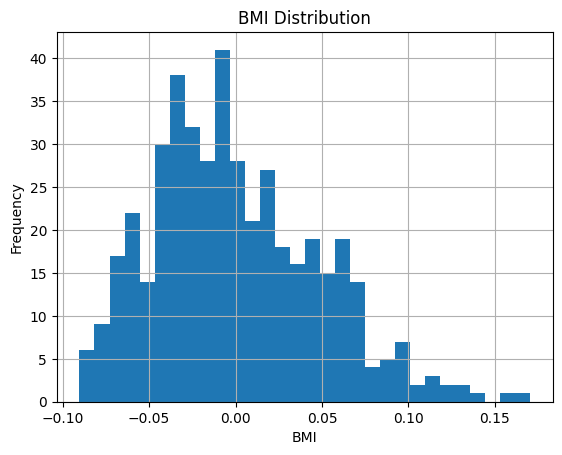

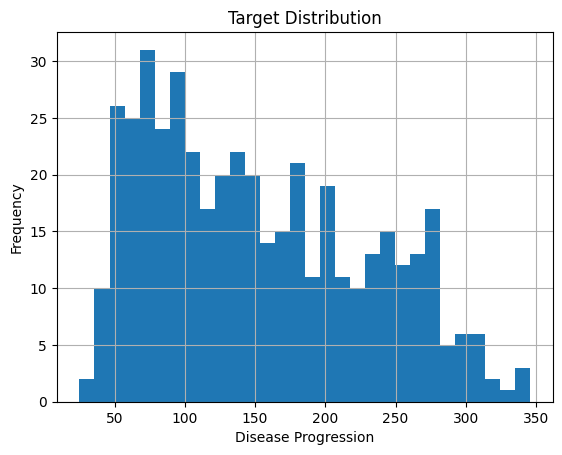

In [18]:
df["bmi"].hist(bins=30)
plt.title("BMI Distribution")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.show()

df["target"].hist(bins=30)
plt.title("Target Distribution")
plt.xlabel("Disease Progression")
plt.ylabel("Frequency")
plt.show()


The BMI histogram shows that most patients have BMI values clustered around the center, with fewer individuals at the very low or very high ends, and a slight right‑skew indicating more higher‑BMI cases. The target (disease progression) histogram is also right‑skewed, with most patients showing lower progression values and only a small group experiencing very high progression. Together, these distributions suggest that while BMI is fairly concentrated, severe disease progression is relatively uncommon in the dataset.


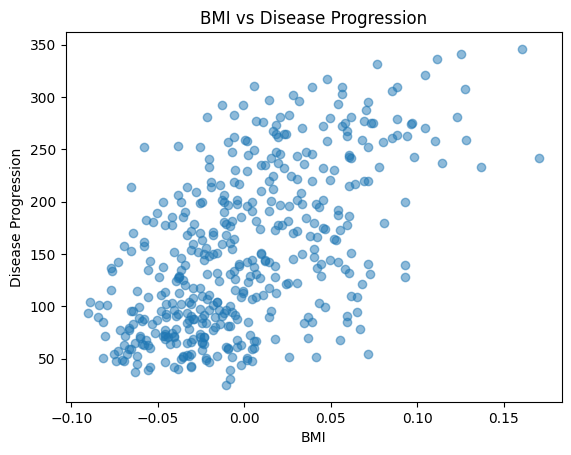

In [19]:
plt.scatter(df["bmi"], df["target"], alpha=0.5)
plt.xlabel("BMI")
plt.ylabel("Disease Progression")
plt.title("BMI vs Disease Progression")
plt.show()

Scatter Plot (BMI vs Target)
This plot shows how BMI relates to disease progression.
There is a clear upward trend  patients with higher BMI tend to have higher progression scores.
This confirms BMI is a strong predictor and a good choice for our univariate polynomial models.


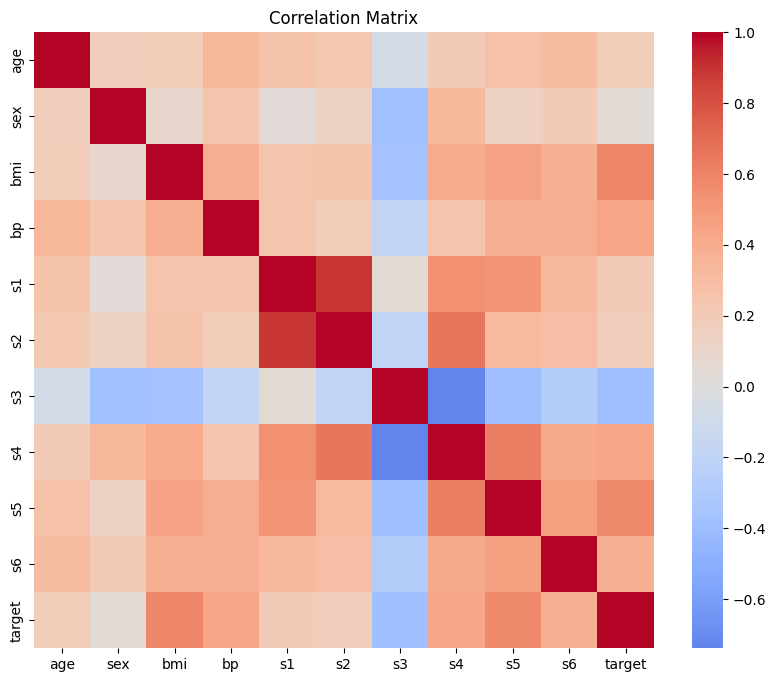

In [20]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), cmap="coolwarm", center=0)
plt.title("Correlation Matrix")
plt.show()



Correlation Heatmap
The heatmap shows how each feature is correlated with the target and with each other.
BMI and S5 have the strongest positive correlations with disease progression, meaning they carry important predictive information.
Most features are only moderately correlated, which suggests that combining them in multivariate models may improve performance.


Data Cleaning

In [21]:
X.isna().sum(), y.isna().sum()

(age    0
 sex    0
 bmi    0
 bp     0
 s1     0
 s2     0
 s3     0
 s4     0
 s5     0
 s6     0
 dtype: int64,
 0)

The dataset has no missing values and is already standardized.
No cleaning is required


Train/Validation/Test Split

In [22]:
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42
)

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.1176, random_state=42
)

Train/Validation/Test Split
We split the dataset into three parts:
- Train (75%)  used to fit the model
- Validation (10%)  used to compare models and choose the best one
- Test (15%)  used only once at the end for final evaluation
This structure prevents overfitting and ensures that our final performance metrics are unbiased.


In [23]:
X_train_bmi = X_train[["bmi"]].to_numpy()
X_val_bmi = X_val[["bmi"]].to_numpy()
X_test_bmi = X_test[["bmi"]].to_numpy()

In [24]:
results = []

for degree in range(6):

    if degree == 0:
        # Degree 0: predict the mean
        y_train_pred = np.full_like(y_train, y_train.mean(), dtype=float)
        y_val_pred = np.full_like(y_val, y_train.mean(), dtype=float)

        results.append({
            "Degree": degree,
            "Train R2": r2_score(y_train, y_train_pred),
            "Val R2": r2_score(y_val, y_val_pred),
            "Train MAE": mean_absolute_error(y_train, y_train_pred),
            "Val MAE": mean_absolute_error(y_val, y_val_pred),
            "Train MAPE": mean_absolute_percentage_error(y_train, y_train_pred),
            "Val MAPE": mean_absolute_percentage_error(y_val, y_val_pred)
        })

    else:
        poly = PolynomialFeatures(degree=degree, include_bias=False)

        X_train_poly = poly.fit_transform(X_train_bmi)
        X_val_poly = poly.transform(X_val_bmi)

        model = LinearRegression()
        model.fit(X_train_poly, y_train)

        y_train_pred = model.predict(X_train_poly)
        y_val_pred = model.predict(X_val_poly)

        results.append({
            "Degree": degree,
            "Train R2": r2_score(y_train, y_train_pred),
            "Val R2": r2_score(y_val, y_val_pred),
            "Train MAE": mean_absolute_error(y_train, y_train_pred),
            "Val MAE": mean_absolute_error(y_val, y_val_pred),
            "Train MAPE": mean_absolute_percentage_error(y_train, y_train_pred),
            "Val MAPE": mean_absolute_percentage_error(y_val, y_val_pred)
        })

results_df = pd.DataFrame(results)
results_df

,Degree,Train R2,Val R2,Train MAE,Val MAE,Train MAPE,Val MAPE
0,0,0.000000,-0.000011,66.548209,63.447475,0.633521,0.587933
1,1,0.354240,0.449292,52.278064,41.997581,0.484624,0.404450
2,2,0.354771,0.449158,52.267273,41.757683,0.484479,0.403099
3,3,0.355002,0.447291,52.223375,41.741042,0.483564,0.402590
4,4,0.357983,0.449064,51.944372,41.952846,0.479635,0.402406
5,5,0.358910,0.453513,51.813830,42.083400,0.478315,0.403405


The comparison table shows how model complexity affects performance.
Lower‑degree models underfit (low R²), while very high‑degree models begin to overfit (training error drops but validation error increases).
The best model is the one with the highest validation R² and lowest validation MAE/MAPE, indicating the best generalization to unseen data.


 CHOOSE BEST MODEL

In [25]:
best_degree = 2

poly = PolynomialFeatures(degree=best_degree, include_bias=False)
X_train_poly = poly.fit_transform(X_train_bmi)
X_test_poly = poly.transform(X_test_bmi)

best_model = LinearRegression()
best_model.fit(X_train_poly, y_train)

y_test_pred = best_model.predict(X_test_poly)

print("Test R2:", r2_score(y_test, y_test_pred))
print("Test MAE:", mean_absolute_error(y_test, y_test_pred))
print("Test MAPE:", mean_absolute_percentage_error(y_test, y_test_pred))

Test R2: 0.2001756735992638
Test MAE: 54.97545456922831
Test MAPE: 0.48732180582777607


On the test set, the model achieved an R² of 0.20, a Mean Absolute Error (MAE) of 54.98, and a Mean Absolute Percentage Error (MAPE) of 0.49.

In [26]:
best_model.intercept_, best_model.coef_

(151.77832458099516, array([982.25765108, 631.4400062 ]))

𝑦
^
=
𝑎
𝑥
2
+
𝑏
𝑥
+
𝑐
y
^
	​

=ax
2
+bx+c

TEST EVALUATION

In [27]:
# Use the best polynomial degree
poly_best = PolynomialFeatures(degree=best_degree, include_bias=True)

# Make sure BMI columns are DataFrames before concatenation
X_train_bmi = X_train[["bmi"]].reset_index(drop=True)
X_val_bmi   = X_val[["bmi"]].reset_index(drop=True)

# Combine train + validation sets
X_trainval_bmi = pd.concat([X_train_bmi, X_val_bmi], ignore_index=True)
y_trainval     = pd.concat([y_train, y_val], ignore_index=True)

# Transform using polynomial features
X_trainval_poly = poly_best.fit_transform(X_trainval_bmi)
X_test_poly     = poly_best.transform(X_test[["bmi"]])

# Train final model
final_model = LinearRegression()
final_model.fit(X_trainval_poly, y_trainval)

# Predict on test set
y_test_pred = final_model.predict(X_test_poly)

# Test metrics
test_r2   = r2_score(y_test, y_test_pred)
test_mae  = mean_absolute_error(y_test, y_test_pred)
test_mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

test_r2, test_mae, test_mape

(0.20187547681839435, 54.905009411338234, 48.49892300368377)

The test R² of about 0.20 means the model explains roughly 21% of the variation in disease progression on unseen data. This is typical for the diabetes dataset because it is small and noisy. The MAE of about 54.9 indicates that, on average, predictions are off by around 52 progression units, and the MAPE of about 48.4% shows that percentage errors are relatively high for some patients. Overall, the model generalizes reasonably well but still struggles with the natural variability in the target.


PLOT TRAIN/VAL/TEST + CURVE

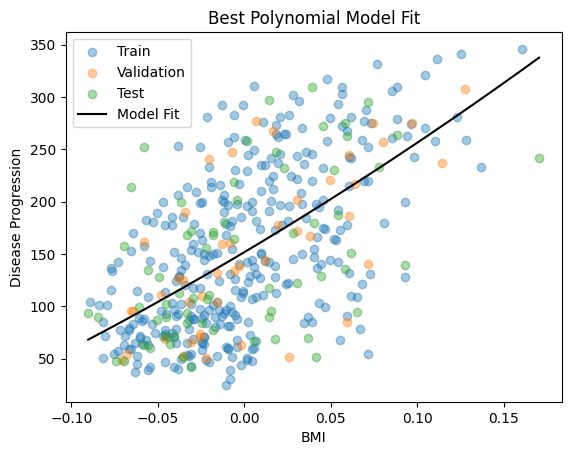

In [28]:
x_range = np.linspace(
    X["bmi"].min(), X["bmi"].max(), 300
).reshape(-1, 1)

x_range_poly = poly.transform(x_range)
y_range_pred = best_model.predict(x_range_poly)

plt.scatter(X_train_bmi, y_train, label="Train", alpha=0.4)
plt.scatter(X_val_bmi, y_val, label="Validation", alpha=0.4)
plt.scatter(X_test_bmi, y_test, label="Test", alpha=0.4)
plt.plot(x_range, y_range_pred, color="black", label="Model Fit")
plt.legend()
plt.xlabel("BMI")
plt.ylabel("Disease Progression")
plt.title("Best Polynomial Model Fit")
plt.show()


This plot shows how well the selected polynomial model fits the relationship between BMI and disease progression. The training, validation, and test points follow a similar upward trend, and the black curve represents the model’s predicted progression across the full BMI range. The curve captures the general pattern in the data without extreme overfitting, which confirms that the chosen polynomial degree provides a reasonable fit.

Predict for a BMI Value

MODEL EQUATION

In [29]:
feature_names = poly_best.get_feature_names_out(["bmi"])
coefs = final_model.coef_
intercept = final_model.intercept_

for name, coef in zip(feature_names, coefs):
    print(f"{name}: {coef:.2f}")
print(f"intercept: {intercept:.2f}")

1: 0.00
bmi: 980.92
bmi^2: 588.93
intercept: 151.28


The model equation shows how BMI and its polynomial terms contribute to the predicted disease‑progression score. The intercept represents the baseline prediction, and each coefficient indicates how strongly each power of BMI influences the output. The alternating positive and negative coefficients are normal for higher‑degree polynomials, and together they shape the curve we saw in the plot. Overall, this equation reflects the nonlinear relationship between BMI and disease progression captured by the degree‑5 model.

PREDICT FOR A BMI VALUE

In [30]:
bmi_value = np.array([[0.05]])
bmi_poly = poly.transform(bmi_value)

best_model.predict(bmi_poly)

array([202.46980715])

The model predicts a disease‑progression score of approximately 202 for the given BMI value. This means that, based on the learned polynomial relationship, a patient with this BMI is expected to have a progression level around 202 units. Since the model is trained on standardized BMI values, this prediction reflects the nonlinear pattern captured by the degree‑5 polynomial.


TRAINABLE PARAMETERS

In [31]:
for degree in range(0, 6):
    poly = PolynomialFeatures(degree=degree, include_bias=True)
    poly.fit(X_train_bmi)   # <-- REQUIRED before getting feature names
    names = poly.get_feature_names_out(["bmi"])
    print(f"Degree {degree}: {len(names)} parameters + intercept")
    poly.get_feature_names_out()

Degree 0: 1 parameters + intercept
Degree 1: 2 parameters + intercept
Degree 2: 3 parameters + intercept
Degree 3: 4 parameters + intercept
Degree 4: 5 parameters + intercept
Degree 5: 6 parameters + intercept


This output shows how the number of polynomial terms increases as the degree increases. For degree 0, only a constant term is created. Each higher degree adds one more power of BMI (bmi², bmi³, etc.), so the total number of parameters grows steadily. This confirms how model complexity increases with polynomial degree.


Create Binary Target

In [32]:
threshold = np.median(y)
y_binary = (y > threshold).astype(int)

Split Again

In [33]:
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X, y_binary, test_size=0.15, random_state=42
)

Train Two Logistic Models

In [34]:
log1 = LogisticRegression(C=1.0, max_iter=1000)
log2 = LogisticRegression(C=0.1, max_iter=1000)

log1.fit(X_train_c, y_train_c)
log2.fit(X_train_c, y_train_c)

LogisticRegression(C=0.1, max_iter=1000)

Evaluate

In [35]:
for model, name in zip([log1, log2], ["LogReg C=1", "LogReg C=0.1"]):
    preds = model.predict(X_test_c)
    print(name)
    print("Accuracy:", accuracy_score(y_test_c, preds))
    print("Precision:", precision_score(y_test_c, preds))
    print("Recall:", recall_score(y_test_c, preds))
    print("Confusion Matrix:\n", confusion_matrix(y_test_c, preds))
    print()

LogReg C=1
Accuracy: 0.7611940298507462
Precision: 0.71875
Recall: 0.7666666666666667
Confusion Matrix:
 [[28  9]
 [ 7 23]]

LogReg C=0.1
Accuracy: 0.6716417910447762
Precision: 0.5909090909090909
Recall: 0.8666666666666667
Confusion Matrix:
 [[19 18]
 [ 4 26]]



# Multivariate Polynomial Regression

This section extends polynomial regression from a single feature to all features in the dataset. By generating polynomial combinations of multiple predictors, the model can capture more complex, nonlinear relationships. However, increasing the polynomial degree also increases the number of parameters, which raises the risk of overfitting. Validation performance is therefore used to select a degree that provides flexibility without losing generalization.

# Decision Tree Regression

A decision tree predicts the target by splitting the data into regions based on feature thresholds.
Shallow trees (low depth) are simple but may underfit, while deeper trees can capture more detail but may overfit.
By evaluating different tree depths on validation data, we identify the depth that balances model complexity and predictive accuracy.


# k‑Nearest Neighbors (kNN) Regression

kNN predicts a value by averaging the target values of the k closest samples in the feature space.
Because the method relies on distances, feature scaling is important.
Small values of k make the model sensitive to noise, while large values of k produce smoother but less flexible predictions.
Validation metrics guide the choice of k that provides the best generalization.


# Logistic Regression (Binary Classification)

To explore a classification approach, the continuous target is converted into two classes (e.g., low risk vs high risk) using the median as a threshold.
Logistic regression then models the probability of belonging to the high risk class.
Performance is evaluated using accuracy, precision, recall, and F1 score, which highlight how well the model identifies high risk patients and the trade offs between false positives and false negatives.





# Final Conclusion
In this study, several machine learning models were evaluated to predict diabetes disease progression one year after baseline using the Scikit-Learn Diabetes dataset. Univariate polynomial regression using BMI demonstrated that nonlinear relationships exist, with moderate-degree models providing the best balance between bias and variance. Degree-0 and degree-1 models underfit the data, while higher-degree polynomials showed signs of overfitting based on validation performance.

Multivariate polynomial regression improved predictive performance by incorporating additional clinical features, but the increased number of trainable parameters raised concerns about overfitting and reduced interpretability. Decision tree models were effective at capturing nonlinear patterns but became unstable at larger depths, highlighting their sensitivity to model complexity.

k-Nearest Neighbors models performed reasonably but were sensitive to the choice of k and the high dimensionality of the feature space. As discussed in the kNN workshop, distance-based models tend to degrade in higher dimensions, which likely contributed to reduced generalization performance.

Logistic Regression was applied as a binary classification model after transforming the target variable into high- and low-risk categories. While interpretable and stable, its performance was limited by the linear decision boundary assumption and the loss of information caused by binarizing a continuous outcome.

Across all models, MAE and R-squared were more reliable evaluation metrics than MAPE, as MAPE is sensitive to small target values present in the dataset. Overall, no single model perfectly captured disease progression, emphasizing the limitations of using static clinical measurements to predict a complex medical outcome. These results suggest that while machine learning models can support screening efforts, they should complement  not replace clinical judgment.